### About Dataset:


* Importing required libraries like pandas, numpy, seaborn, matplotlib.pyplot.
* warnings.filterwarnings("ignore") ignores any warnings that might be generated whie executing the code.
* df =pd.read_csv("weather_data.csv") reads the csv file.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

df =pd.read_csv("weather_data.csv")

In [52]:
df.head()

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.68,41.20,4.02,8.23
1,San Diego,5/17/2024 15:22,8.73,58.32,9.11,27.72
2,San Diego,5/11/2024 9:30,11.63,38.82,4.61,28.73
3,Philadelphia,2/26/2024 17:32,-8.63,54.07,3.18,26.37
4,San Antonio,4/29/2024 13:23,39.81,72.90,9.60,29.90


* df.describe(include='all') is used to get both numerical and non-numerical summary of the dataset
* we can see the number of non null, unique values and the most frequent value along with the frequency of the most frequent value.
* we can also see the mean, standard deviation, minimum and maximun value, 25% 50% and 75% quartile.

In [54]:
df.describe(include='all')

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,5319,5319,5319.000000,5319.000000,5319.000000,5320.000000
unique,10,5242,NaN,NaN,NaN,NaN
top,San Jose,4/13/2024 1:34,NaN,NaN,NaN,NaN
freq,568,2,NaN,NaN,NaN,NaN
mean,NaN,NaN,14.899861,60.168440,5.090519,14.962282
std,NaN,NaN,14.492866,17.392269,2.963413,8.796211
min,NaN,NaN,-19.700000,30.020000,0.000000,0.000000
25%,NaN,NaN,2.320000,44.880000,2.550000,7.210000
50%,NaN,NaN,14.960000,60.260000,5.130000,14.835000
75%,NaN,NaN,27.420000,75.280000,7.590000,22.805000


* df.info() is used to get the structure of the dataset.
* There are single null values in the dataset.
* Out of the 6 columns, 4 columns have flopat64 datatype and 2 columns have object datatype.
* The total memory used by the dataset is 249.5+ KB.

In [56]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          5319 non-null   object 
 1   Date_Time         5319 non-null   object 
 2   Temperature_C     5319 non-null   float64
 3   Humidity_pct      5319 non-null   float64
 4   Precipitation_mm  5319 non-null   float64
 5   Wind_Speed_kmh    5320 non-null   float64
dtypes: float64(4), object(2)
memory usage: 249.5+ KB
None


* Using df.isnull().sum() we can see there are no null values in dataframe df
* df.dtypes gives us the datatypes of the columns. We have 4 float64 and 2 object datatypes.
* df.shape shows us that 5320 rows and 6 columns.

In [58]:
df.isnull().sum()

Location            1
Date_Time           1
Temperature_C       1
Humidity_pct        1
Precipitation_mm    1
Wind_Speed_kmh      0
dtype: int64

* Since we have null values in the dataset, by using forward fill method we are replacing them. 

In [60]:
df.fillna(method='ffill', inplace=True) 

In [61]:
df.isnull().sum()

Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

In [62]:
print(df.describe())

       Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh
count    5320.000000   5320.000000       5320.000000     5320.000000
mean       14.904430     60.173289          5.089838       14.962282
std        14.495336     17.394231          2.963550        8.796211
min       -19.700000     30.020000          0.000000        0.000000
25%         2.320000     44.885000          2.550000        7.210000
50%        14.965000     60.260000          5.130000       14.835000
75%        27.427500     75.282500          7.590000       22.805000
max        39.980000     90.000000         14.530000       30.000000


In [63]:
df.dtypes

Location             object
Date_Time            object
Temperature_C       float64
Humidity_pct        float64
Precipitation_mm    float64
Wind_Speed_kmh      float64
dtype: object

In [64]:
df.shape

(5320, 6)

**Data set overview**

Dataset comntains 6 columns and 5320 rows.  Most of the columns are floats except Location and Data_Time are objects.

Description of each column:

- Temperature_C : Temperature in Celsius
- Humidity_pct : Representing humidity in percentage.
- Precipitation_mm : Condensing precipitation calculating in millimeters.
- Wind_Speed_kmh : As usual speed of the wind in kilometer per hour.

##### **Analysis of Data**

**correlation matrix between features**

* Generates a heatmap to display the correlation matrix of every column in the dataframe.
* df.select_dtypes(include=['number'] is used to select only numerical columns in the dataframe.

Text(0.5, 1.0, 'correlation matrix of each column')

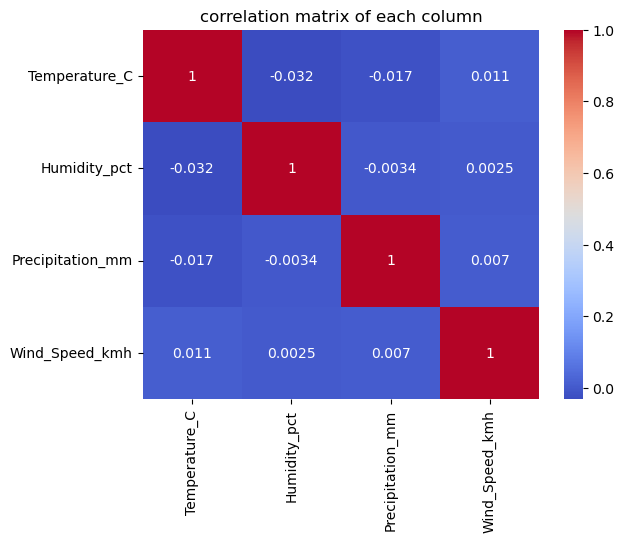

In [69]:
plt.figure()
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title('correlation matrix of each column')

* Temperature vs. Humidity: The correlation is approximately -0.032, suggesting a very weak negative correlation.

* Temperature vs. Precipitation: The correlation is approximately -0.017, which also indicates a very weak negative.

* Temperature vs. Wind Speed: The correlation is approximately 0.011, showing a very weak positive correlation, means having minimal relationship.

* Humidity vs. Precipitation: With a correlation of -0.0034, are also almost independent.

* Humidity vs. Wind Speed: The correlation of 0.0025 indicates a negligible positive.

* Precipitation vs. Wind Speed: The correlation is 0.007, meaning there is almost no relationship between these variables.

* All correlations are close to zero, indicating little to no linear relationship between any pair of these variables.

* As variables might be heavily independent in the dataset or non-linear.

* Generates a boxplot to display the correlation matrix of columns in the dataframe.
* df1.select_dtypes(include=['number'] is used to select only numerical columns.

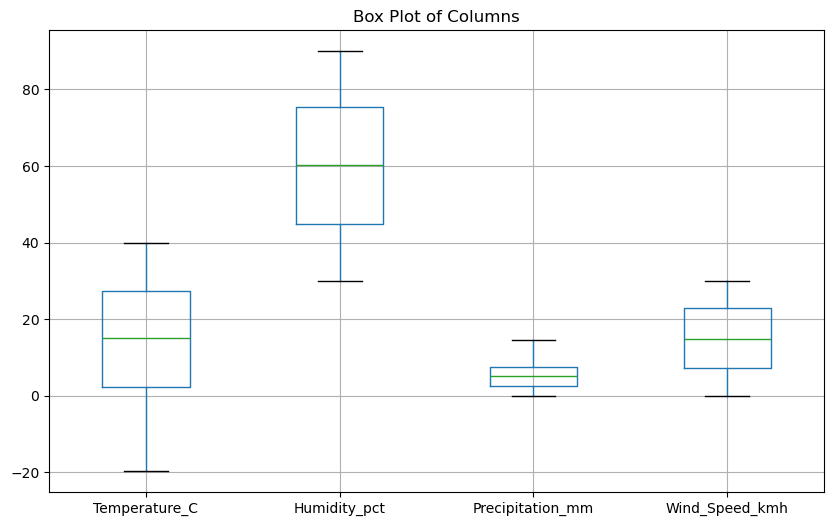

In [72]:
plt.figure(figsize=(10, 6))
df.select_dtypes(include=['number']).boxplot()
# sns.boxplot(x=df['Temperature_C'])
plt.title('Box Plot of Columns')
plt.show()

* Temperature, Humidity, and Wind Speed have much wider distributions with higher variability.
  
* Precipitation data shows minimal variation, suggesting low or no rainfall.

* No extreme outliers are present in the data for any of the columns.

* sns.pairplot(df) is used to represent connections among numerous variables in df.

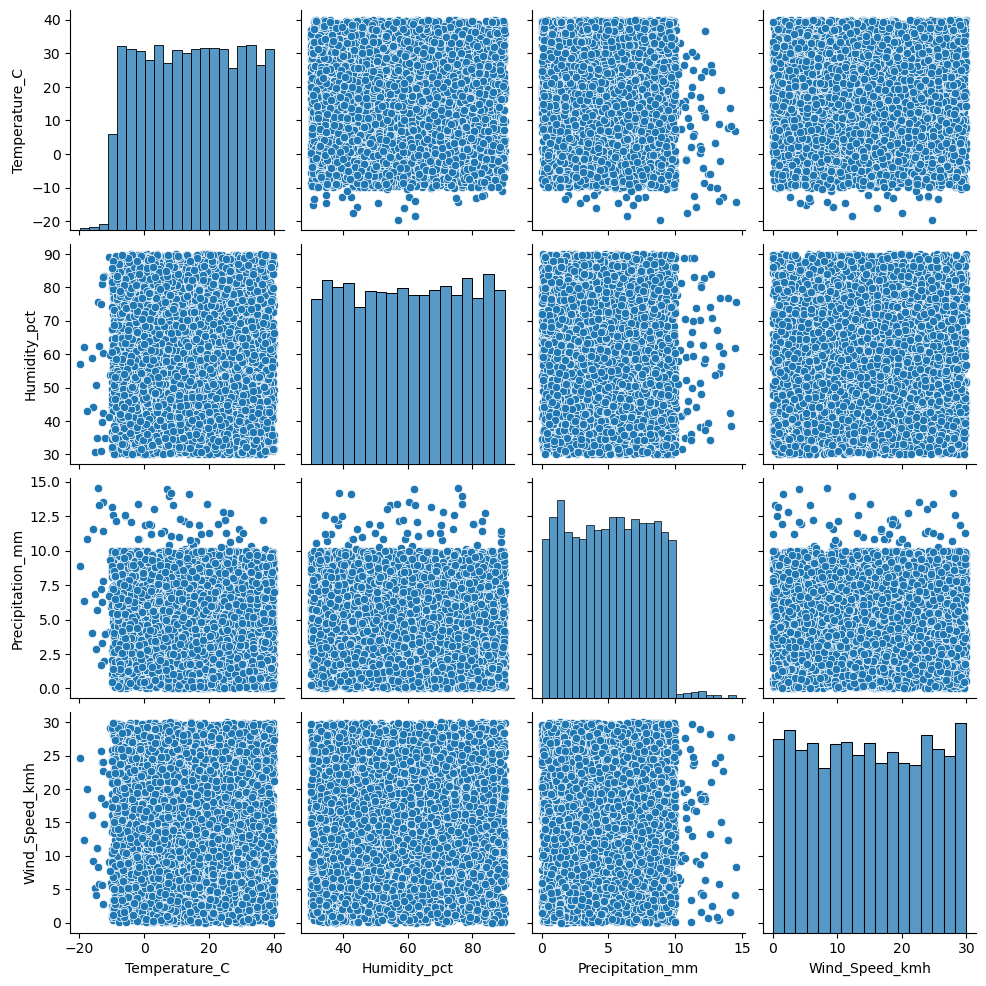

In [75]:
sns.pairplot(df)

* It can be seen that every variable in the pairplot, is slightly interconnected even they are mostly independent.

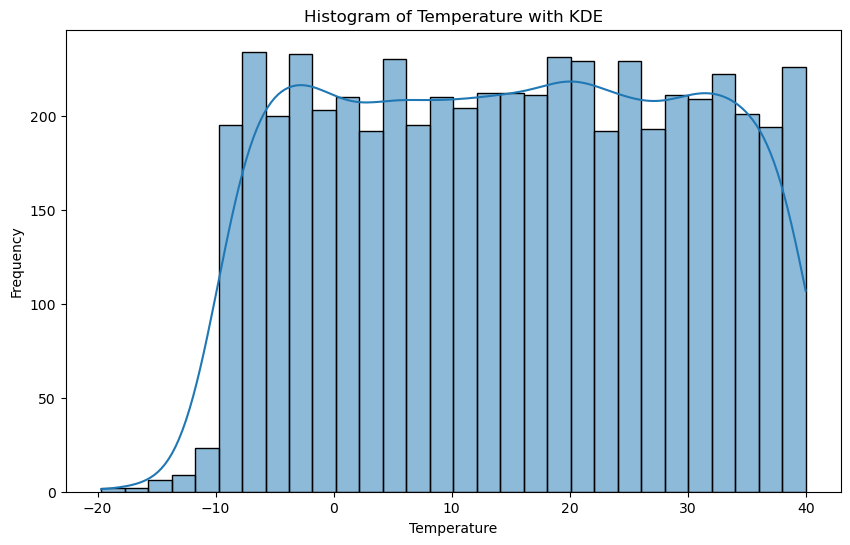

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature_C'], bins=30, kde=True)
plt.title('Histogram of Temperature with KDE')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

* The histplot shows that temperature has a broad, uniform distribution between 0°C and 30°C, suggesting a consistent frequency of observations across this range.
    
* The presence of lower frequencies around -20°C and 40°C may represent rare temperature conditions.

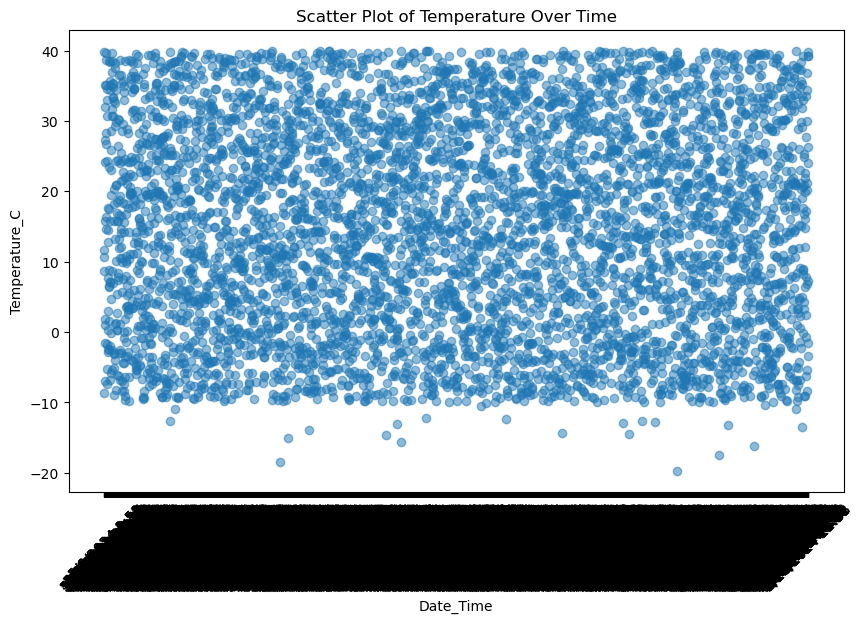

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Date_Time'], df['Temperature_C'], alpha=0.5)
plt.title('Scatter Plot of Temperature Over Time')
plt.xlabel('Date_Time')
plt.ylabel('Temperature_C')
plt.xticks(rotation=45)
plt.show()

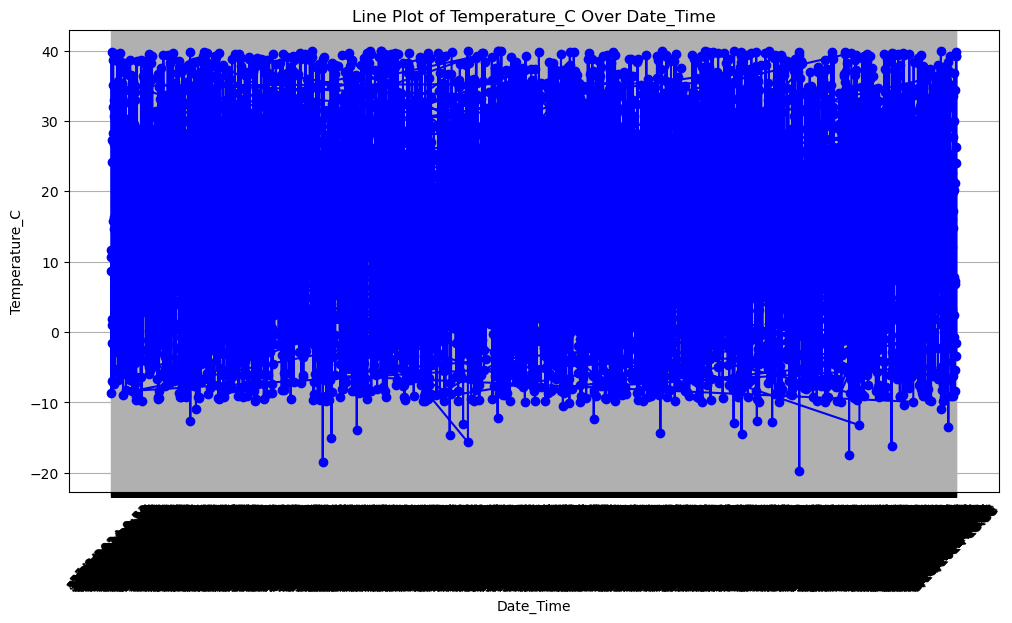

In [80]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date_Time'], df['Temperature_C'], color='blue', marker='o', linestyle='-')
plt.title('Line Plot of Temperature_C Over Date_Time')
plt.xlabel('Date_Time')
plt.ylabel('Temperature_C')
plt.xticks(rotation=45)
plt.grid()
plt.show()

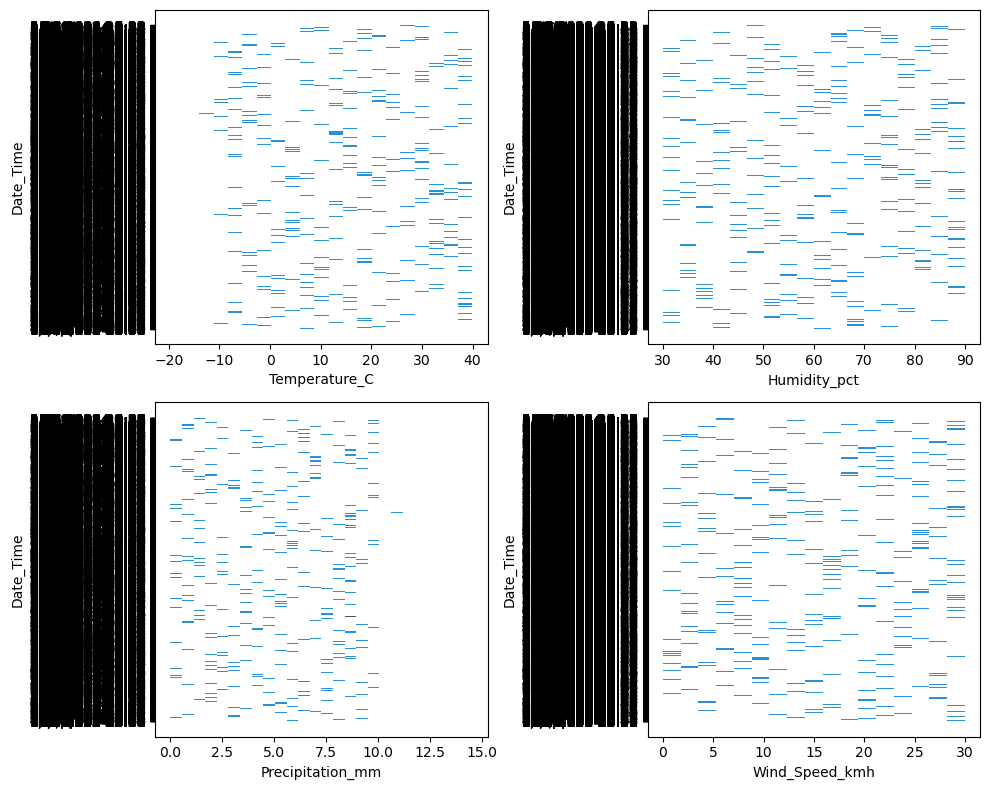

In [81]:
fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df, x = 'Temperature_C', y = 'Date_Time',ax=ax[0,0])
sns.histplot(data=df, x = 'Humidity_pct', y = 'Date_Time',ax=ax[0,1])
sns.histplot(data=df, x = 'Precipitation_mm', y = 'Date_Time',ax=ax[1,0])
sns.histplot(data=df, x = 'Wind_Speed_kmh', y = 'Date_Time',ax=ax[1,1])

plt.tight_layout()
plt.show()

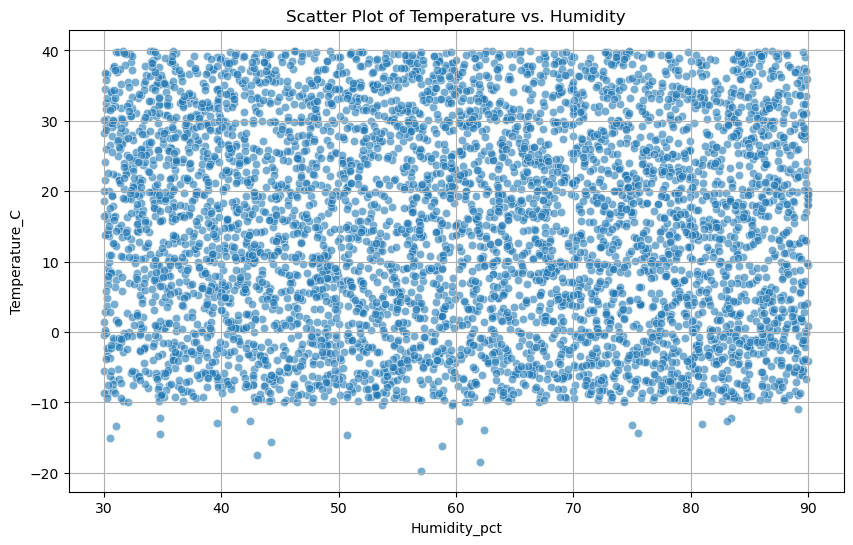

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Humidity_pct'], y=df['Temperature_C'], alpha=0.6)
plt.title('Scatter Plot of Temperature vs. Humidity')
plt.xlabel('Humidity_pct')
plt.ylabel('Temperature_C')
plt.grid()
plt.show()

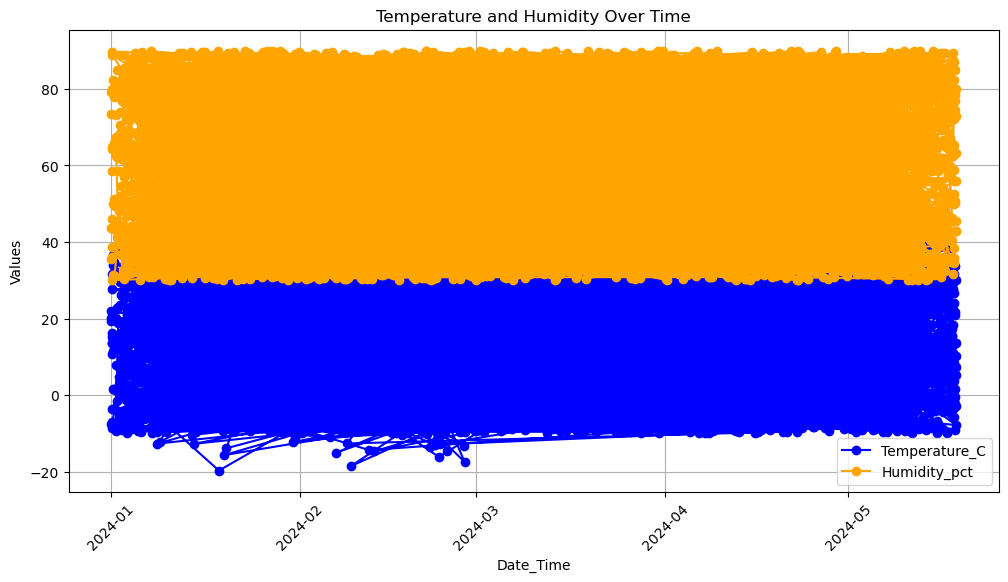

In [83]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')  # Convert to datetime, coercing errors

# Drop rows with NaT in 'date' after conversion
df.dropna(subset=['Date_Time'], inplace=True)

# Check for NaN values in temperature and humidity
df.dropna(subset=['Temperature_C', 'Humidity_pct'], inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Date_Time'], df['Temperature_C'], color='blue', marker='o', linestyle='-', label='Temperature_C')

plt.plot(df['Date_Time'], df['Humidity_pct'], color='orange', marker='o', linestyle='-', label='Humidity_pct')

plt.title('Temperature and Humidity Over Time')
plt.xlabel('Date_Time')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

### Model Training

**KNN**

* Feature scaling is performed by importing StandardScaler to standardize numerical columns which can be helpful in enhancing model performance and robustness to outliers
* Dividing the dataset into training database using the train test split function.
.

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
for col in datetime_cols:
    df[col] = df[col].astype('int64')  # Convert to timestamp (nanoseconds since epoch)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df.drop(columns=['Temperature_C']) 
y = df['Temperature_C']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* K Neighbor Regressor and mean square error is imported with 5 neighbors.
* Classifier is fitted on the training data.
* The MSE of KNN is about 15.717

In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# KNN Model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Calculate RMSE
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
print(f"KNN RMSE: {knn_rmse}")

KNN RMSE: 15.717433463409085


* Metrics is imported from sklearn to use various metrics and weights with different k values.

In [88]:
import sklearn.metrics
import sklearn.neighbors
from sklearn.neighbors import KNeighborsRegressor

k_values = [1, 3, 5]
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan', 'minkowski']
for k in k_values:
    for weight in weights:
        for metric in metrics:
            regressor = KNeighborsRegressor(n_neighbors=k, weights=weight, metric=metric)
            regressor.fit(X_train, y_train)
            yhats = regressor.predict(X_test)
            error = sklearn.metrics.mean_squared_error(yhats, y_test, squared=False)
            print(f"The mean square error of the k-nearest neighbors with k={k}, weight={weight}, metric={metric} is {error:.2f}")

The mean square error of the k-nearest neighbors with k=1, weight=uniform, metric=euclidean is 20.43
The mean square error of the k-nearest neighbors with k=1, weight=uniform, metric=manhattan is 20.40
The mean square error of the k-nearest neighbors with k=1, weight=uniform, metric=minkowski is 20.43
The mean square error of the k-nearest neighbors with k=1, weight=distance, metric=euclidean is 20.43
The mean square error of the k-nearest neighbors with k=1, weight=distance, metric=manhattan is 20.40
The mean square error of the k-nearest neighbors with k=1, weight=distance, metric=minkowski is 20.43
The mean square error of the k-nearest neighbors with k=3, weight=uniform, metric=euclidean is 16.34
The mean square error of the k-nearest neighbors with k=3, weight=uniform, metric=manhattan is 16.21
The mean square error of the k-nearest neighbors with k=3, weight=uniform, metric=minkowski is 16.34
The mean square error of the k-nearest neighbors with k=3, weight=distance, metric=eucli

* By using Grid SearchCV the hyperparameters are tuned and found that the value with k=9 is the best.

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print(f"Best KNN Hyperparameters: {grid_knn.best_params_}")

Best KNN Hyperparameters: {'n_neighbors': 9}


**Logistic Regression**

* LogisticRegression is imported and fitted on the training data for the purpose of classifications.* The  prediction are mades on the test dat and accuracy is obtained with 70.58%.
* The MSE learned is 20.701.

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert temperature to binary
threshold = 25  
y_binary = (y > threshold).astype(int)

X_train, X_test, y_train_binary, y_test_binary = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_binary)
log_reg_predictions = log_reg.predict(X_test)

# Calculate Accuracy
log_reg_accuracy = accuracy_score(y_test_binary, log_reg_predictions)
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")

log_reg_rmse = np.sqrt(mean_squared_error(y_test, log_reg_predictions))
print(f"Log_reg RMSE: {log_reg_rmse}")

Logistic Regression Accuracy: 0.7058270676691729
Log_reg RMSE: 20.701779531042245


* Hyperparameter tuning with different C values, the best parameter is likely to be 0.1

In [92]:
param_grid_log_reg = {'C': [0.1, 1, 10, 100]}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log_reg, cv=5)
grid_log_reg.fit(X_train, y_train_binary)

print(f"Best Logistic Regression Hyperparameters: {grid_log_reg.best_params_}")

Best Logistic Regression Hyperparameters: {'C': 0.1}


**Random Forest**

* Random Forest is a supervised learning algorithm that uses multiple decision trees to make predictions.
* The predicted MSE is 14.707

In [94]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")

Random Forest RMSE: 14.707584827078335


* Hyperparameter tuning for randon forest with n estimators and maximum depth the best are with max_depth=10, n_estimators=200

In [95]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print(f"Best Random Forest Hyperparameters: {grid_rf.best_params_}")

Best Random Forest Hyperparameters: {'max_depth': 10, 'n_estimators': 200}


**Neural Network With Three Nodes**

* Until now the models are trained and predicted using single node.
* From now on, by making using of 3 nodes with a target.
* Min Max Scaler and MLP regressor is imported from the neural_network, the scaled and fitted the feature parameters.

Hidden Layers (16,): Mean Absolute Error = 12.8928 °C
Hidden Layers (32,): Mean Absolute Error = 12.8902 °C
Hidden Layers (32, 16): Mean Absolute Error = 12.8889 °C
Hidden Layers (32, 16, 8): Mean Absolute Error = 12.8872 °C
Best Hidden Layer Configuration: (32, 16, 8)
Final Neural Network MAE: 12.8872 °C
Final Neural Network MSE: 217.2332 °C²


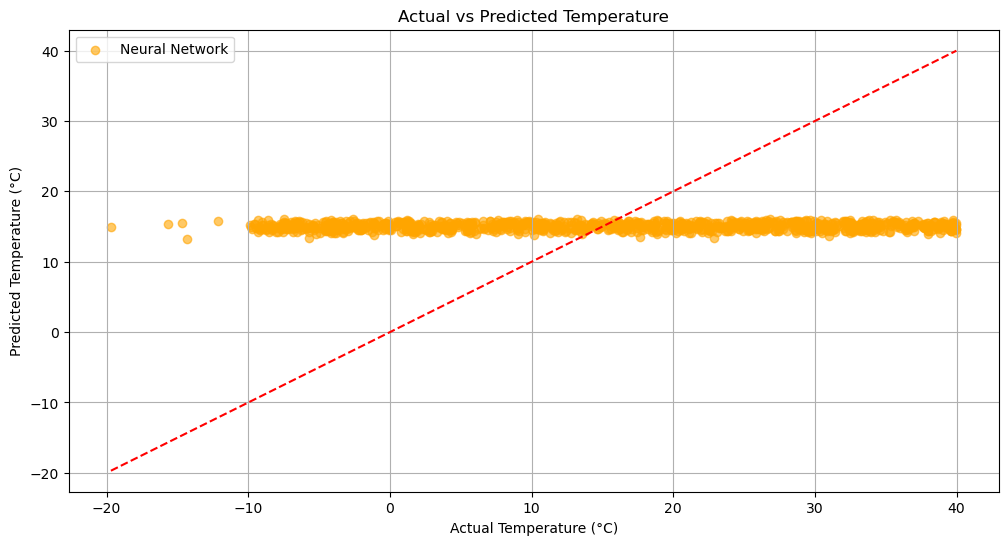

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# relevant numerical features
features = ["Humidity_pct", "Precipitation_mm", "Wind_Speed_kmh"]
target = "Temperature_C"

# Drop rows with missing values if any
data_cleaned = df.dropna(subset=features + [target])

# Split into inputs (X) and target (y)
X = data_cleaned[features].values
y = data_cleaned[target].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Neural Network
# Experiment with different hidden layer configurations
hidden_layer_sizes = [(16,), (32,), (32, 16), (32, 16, 8)]  # Different architectures
errors = []

for layers in hidden_layer_sizes:
    nn_model = MLPRegressor(hidden_layer_sizes=layers, activation='relu', solver='adam',
                            learning_rate_init=0.001, max_iter=500, random_state=42)
    nn_model.fit(X_train, y_train)
    y_pred_nn = nn_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_nn)
    errors.append(mae)
    print(f"Hidden Layers {layers}: Mean Absolute Error = {mae:.4f} °C")

# Select the best architecture based on MAE
best_layers = hidden_layer_sizes[errors.index(min(errors))]
print(f"Best Hidden Layer Configuration: {best_layers}")

# Retrain the best model
final_nn_model = MLPRegressor(hidden_layer_sizes=best_layers, activation='relu', solver='adam',
                              learning_rate_init=0.001, max_iter=500, random_state=42)
final_nn_model.fit(X_train, y_train)
y_pred_nn = final_nn_model.predict(X_test)

# Evaluate the final model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Final Neural Network MAE: {mae_nn:.4f} °C")
print(f"Final Neural Network MSE: {mse_nn:.4f} °C²")

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6, label='Neural Network', color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title(f"Actual vs Predicted Temperature")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


* The predictions are aligned poorly with the actual values, as most points are getting deviated from the red line.
* Mean Absolute Error (MAE) with 12.88°C indicating a significant deviation.
* Model struggles to retrieve the temperature distribution effectively, due to non-linear relationships in the data.

**Linear Regression With Three Nodes**

Linear Regression MAE: 12.3645 °C
Linear Regression MSE: 204.7122 °C²


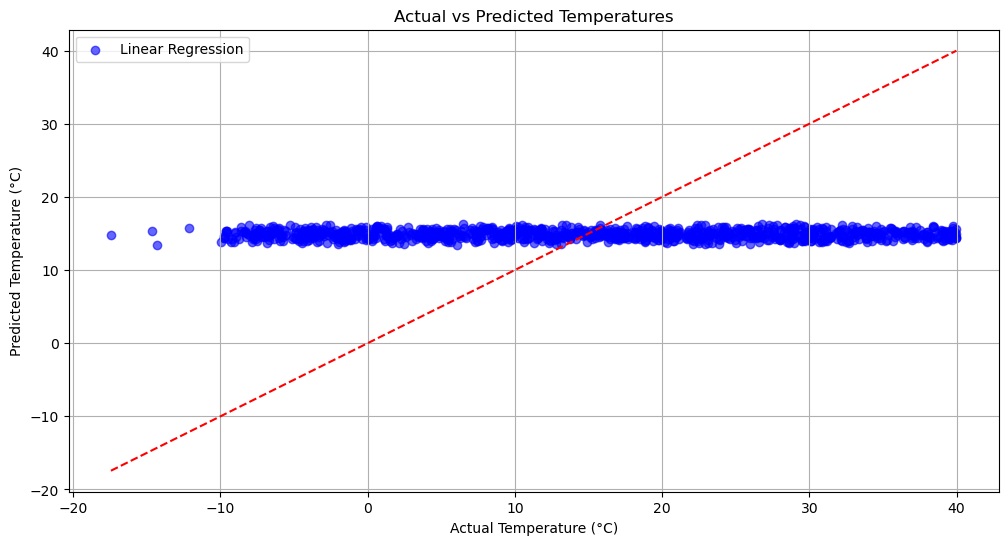

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# relevant numerical features
features = ["Humidity_pct", "Precipitation_mm", "Wind_Speed_kmh"]
target = "Temperature_C"

# Drop rows with missing values if any
data_cleaned = df.dropna(subset=features + [target])

# Split into inputs (X) and target (y)
X = data_cleaned[features].values
y = data_cleaned[target].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MAE: {mae_linear:.4f} °C")
print(f"Linear Regression MSE: {mse_linear:.4f} °C²")

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, label='Linear Regression', color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

* Similar to the neural network, predictions shows error.
* MAE is 12.36°C comparable to the neural network.

**Random Forest With Three Nodes**

Random Forest MAE: 12.8017 °C
Random Forest MSE: 225.8489 °C²


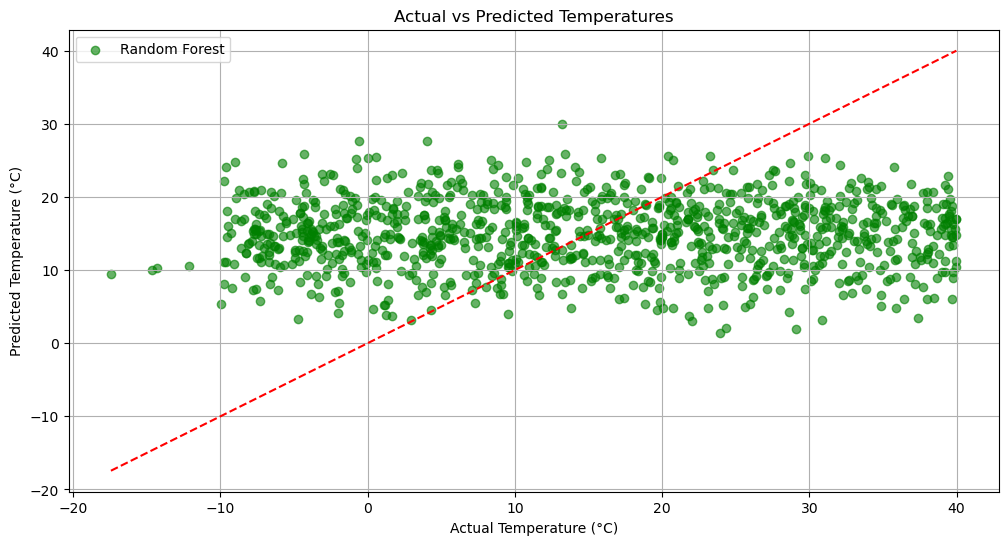

In [101]:
# Random Forest Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae_rf:.4f} °C")
print(f"Random Forest MSE: {mse_rf:.4f} °C²")

# Plot Predictions vs Actual
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest', color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

* Predictions show moderate alignment with the actual values, but significant deviations are still existing.
* With MAE 12.80°C worse than linear and neural network models, possibly due to insufficient tuning data.

**KNN With Three Nodes**

K=3: Mean Absolute Error = 13.6570 °C
K=5: Mean Absolute Error = 13.0821 °C
K=7: Mean Absolute Error = 12.8776 °C
K=9: Mean Absolute Error = 12.9020 °C
Best K: 7
Final KNN Regression MAE: 12.8776 °C
Final KNN Regression MSE: 232.5831 °C²


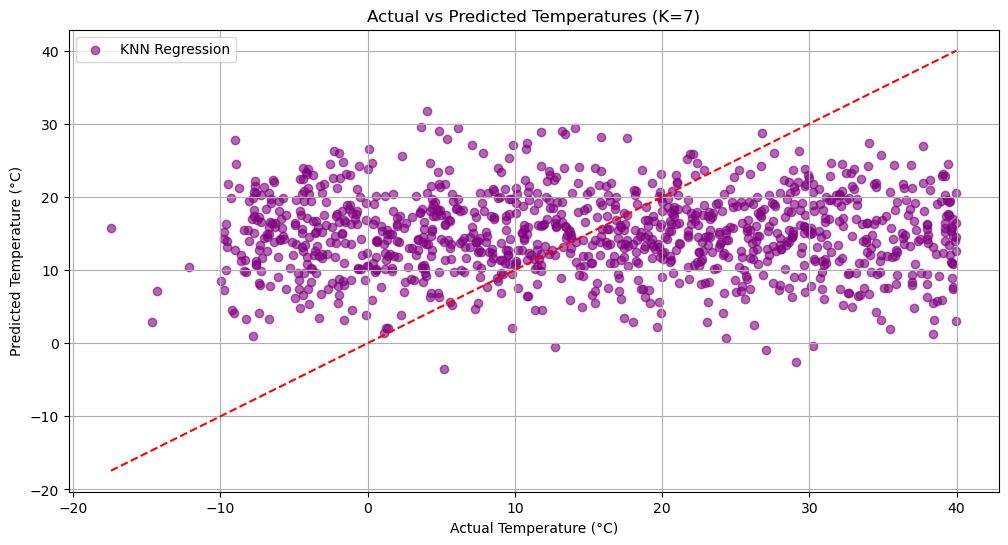

In [103]:
# Select relevant numerical features
features = ["Humidity_pct", "Precipitation_mm", "Wind_Speed_kmh"]
target = "Temperature_C"

# Drop rows with missing values if any
data_cleaned = df.dropna(subset=features + [target])

# Split into inputs (X) and target (y)
X = data_cleaned[features].values
y = data_cleaned[target].values

# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# KNN Regression
# Test different values for k (number of neighbors)
k_values = [3, 5, 7, 9]
errors = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_knn)
    errors.append(mae)
    print(f"K={k}: Mean Absolute Error = {mae:.4f} °C")

# Choose the best K and retrain the model
best_k = k_values[errors.index(min(errors))]
print(f"Best K: {best_k}")

final_knn_model = KNeighborsRegressor(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)
y_pred_knn = final_knn_model.predict(X_test)

# Evaluate the final model
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Final KNN Regression MAE: {mae_knn:.4f} °C")
print(f"Final KNN Regression MSE: {mse_knn:.4f} °C²")

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6, label='KNN Regression', color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title(f"Actual vs Predicted Temperatures (K={best_k})")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid()
plt.show()

* Where k=7 is the best parameter predicted MAE with 12.87°C which is still larger than the previous models.